# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | saint-louis
Processing Record 4 of Set 1 | demba
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | dryden
Processing Record 10 of Set 1 | magdagachi
Processing Record 11 of Set 1 | berezovyy
Processing Record 12 of Set 1 | bulungu
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | grand falls-windsor
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | sinop
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,32.70,93,100,6.91,CA,1701299498
1,longyearbyen,78.2186,15.6401,26.44,86,75,14.97,SJ,1701299498
2,saint-louis,16.3333,-15.0000,78.57,13,0,10.49,SN,1701299499
3,demba,-5.5100,22.2667,67.55,98,100,2.39,CD,1701299499
4,waitangi,-43.9535,-176.5597,54.82,75,98,8.01,NZ,1701299329


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,32.70,93,100,6.91,CA,1701299498
1,longyearbyen,78.2186,15.6401,26.44,86,75,14.97,SJ,1701299498
2,saint-louis,16.3333,-15.0000,78.57,13,0,10.49,SN,1701299499
3,demba,-5.5100,22.2667,67.55,98,100,2.39,CD,1701299499
4,waitangi,-43.9535,-176.5597,54.82,75,98,8.01,NZ,1701299329


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

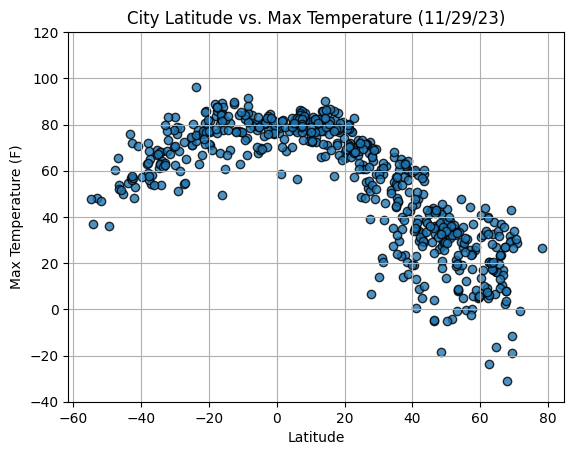

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Set the y limit
plt.ylim(-40, 120)

#gridlines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

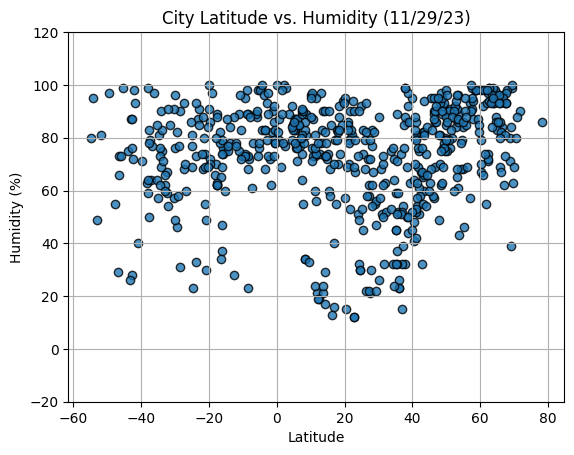

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Set the y limit
plt.ylim(-20, 120)

#gridlines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

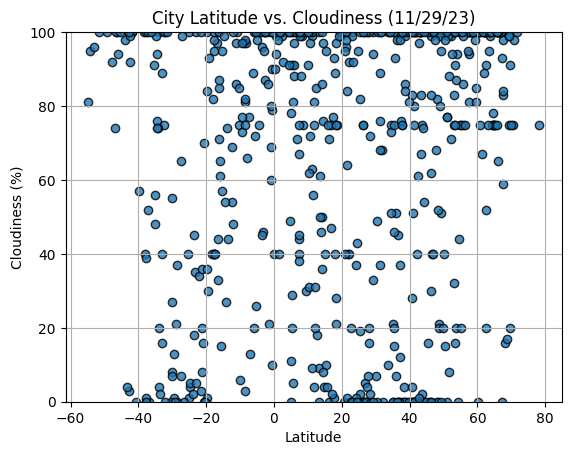

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Set the y limit
plt.ylim(0, 100)

#gridlines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

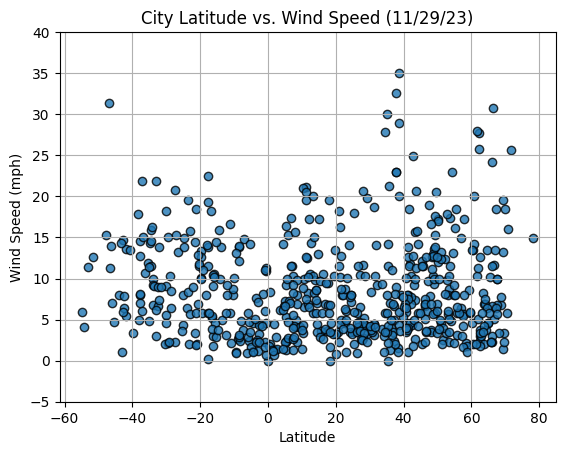

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Set the y limit
plt.ylim(-5, 40)

#gridlines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    
    # Print r value
    print(f"The r-value is: {r_value}")
    
    # Show plot
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,32.70,93,100,6.91,CA,1701299498
1,longyearbyen,78.2186,15.6401,26.44,86,75,14.97,SJ,1701299498
2,saint-louis,16.3333,-15.0000,78.57,13,0,10.49,SN,1701299499
5,yellowknife,62.4560,-114.3525,6.42,98,100,3.00,CA,1701299383
6,albany,42.6001,-73.9662,29.62,67,61,4.36,US,1701299500


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,demba,-5.5100,22.2667,67.55,98,100,2.39,CD,1701299499
4,waitangi,-43.9535,-176.5597,54.82,75,98,8.01,NZ,1701299329
7,puerto ayora,-0.7393,-90.3518,78.55,86,60,5.99,EC,1701299500
11,bulungu,-4.5500,18.6000,69.80,99,100,1.12,CD,1701299502
14,ancud,-41.8697,-73.8203,52.74,93,100,13.62,CL,1701299503


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8585537749250772


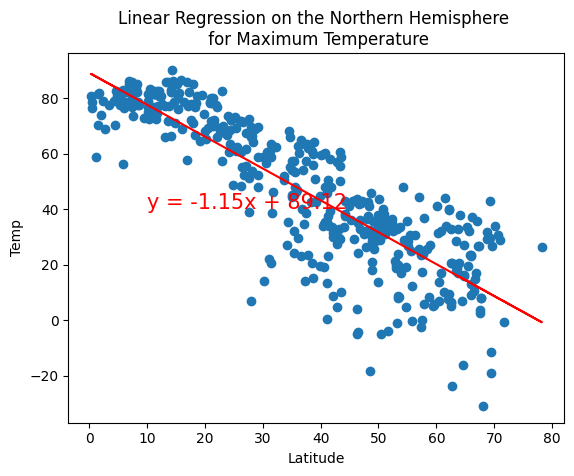

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', (10,40))


The r-value is: 0.6951642892390028


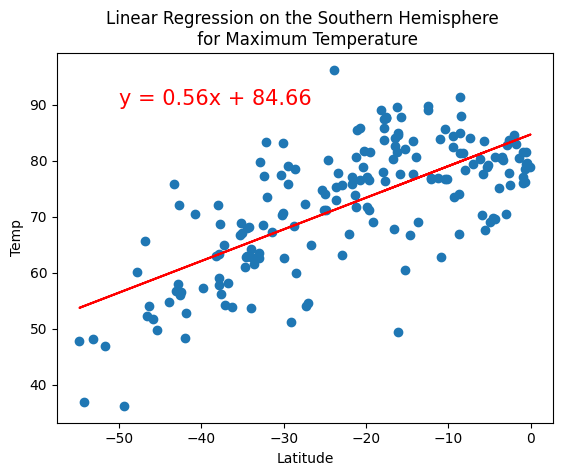

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', (-50,90))

**Discussion about the linear relationship:** In the Northern Hemisphere, as you go further north, it gets colder. The data shows a strong negative relationship between latitude and temperature, meaning as latitude increases (moving north), the temperature tends to drop. In the Southern Hemisphere, it's a bit different. As you travel north, it actually gets warmer, at least until you hit the equator. The data shows a moderately strong positive relationship, meaning as you go further north, temperatures tend to rise.

Overall, this just tells us what we might already feel: it's warmer near the equator and cooler as you head towards the poles. The Northern Hemisphere shows a stronger pattern, probably because it has more land than the ocean-heavy Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22033127977757616


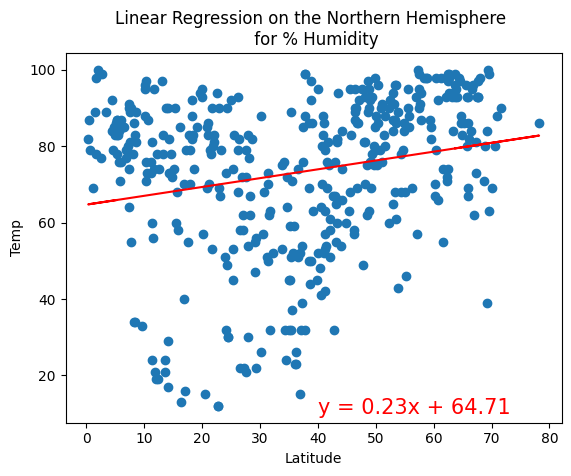

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', (40,10))


The r-value is: 0.21226116610311574


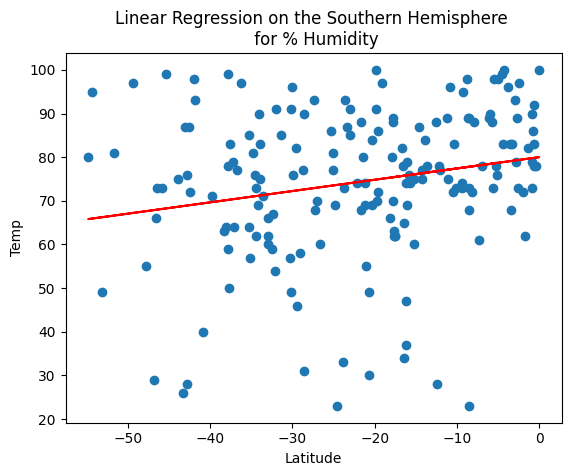

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', (-50,15))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the link between how far north or south you are (latitude) and how humid it is, isn't very strong. In the Northern Hemisphere, as you go further north, there's a tiny increase in humidity, but it's not a big change. In the Southern Hemisphere, it's pretty much the same story. Heading south might bring a bit more humidity, but again, it's not a clear-cut trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


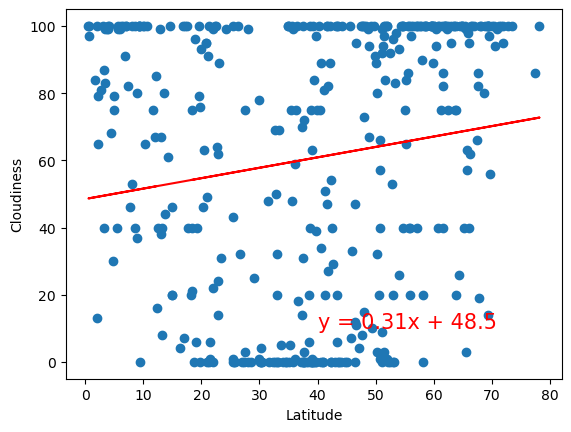

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', (40,10))

The r-value is: 0.02056735429994368


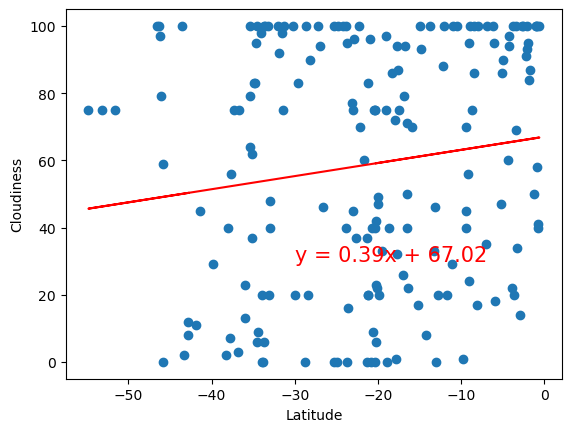

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', (-50,60))

**Discussion about the linear relationship:** both are low correlation, but the trend is as you go north both in the northern and southern hemisphere the higher the cloudiness becomes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12379775148000711


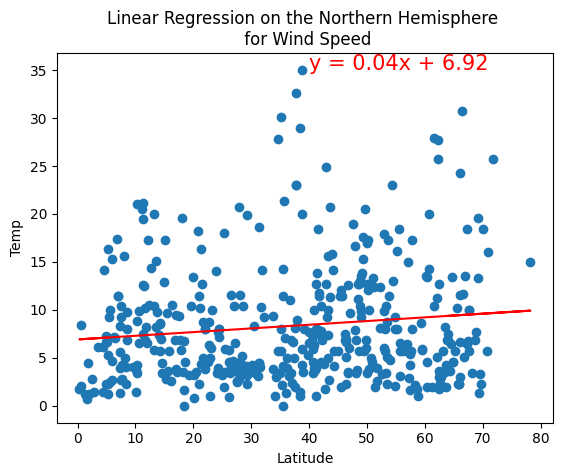

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', (40,35))

The r-value is: -0.35872415090501397


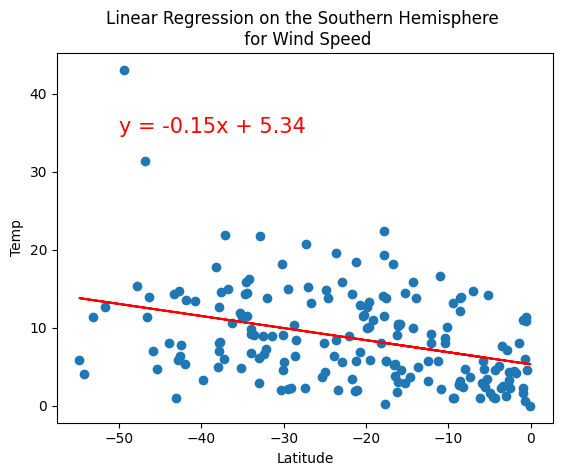

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', (-50,35))

**Discussion about the linear relationship:** Northern Hemisphere (Latitude vs. Wind Speed): a very weak positive correlation. This means that as you move further north, there's a slight tendency for wind speeds to increase, but the relationship is not strong or consistent.
Southern Hemisphere (Latitude vs. Wind Speed): moderate negative correlation. This suggests that in the Southern Hemisphere, as you move closer to the equator (decreasing latitude), wind speeds tend to increase slightly more noticeably than in the Northern Hemisphere.